In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import glob
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [2]:
cols = [ 'expiration_id', 'protocol', 'src_port', 'dst_port',
       'ip_version',   'bidirectional_duration_ms', 'bidirectional_packets',
       'bidirectional_bytes', 'src2dst_duration_ms', 'src2dst_packets',
       'src2dst_bytes', 'dst2src_duration_ms', 'dst2src_packets', 'dst2src_bytes',
       'bidirectional_min_ps', 'bidirectional_mean_ps',
       'bidirectional_stddev_ps', 'bidirectional_max_ps',
       'src2dst_min_ps', 'src2dst_mean_ps', 'src2dst_stddev_ps',
       'src2dst_max_ps', 'dst2src_min_ps', 'dst2src_mean_ps',
       'dst2src_stddev_ps', 'dst2src_max_ps', 'bidirectional_min_piat_ms',
       'bidirectional_mean_piat_ms', 'bidirectional_stddev_piat_ms',
       'bidirectional_max_piat_ms', 'src2dst_min_piat_ms',
       'src2dst_mean_piat_ms', 'src2dst_stddev_piat_ms',
       'src2dst_max_piat_ms', 'dst2src_min_piat_ms',
       'dst2src_mean_piat_ms', 'dst2src_stddev_piat_ms',
       'dst2src_max_piat_ms', 'bidirectional_syn_packets', 'bidirectional_ack_packets',
       'bidirectional_psh_packets', 'bidirectional_rst_packets',
       'bidirectional_fin_packets', 'src2dst_syn_packets', 'src2dst_ack_packets',
       'src2dst_psh_packets', 'src2dst_rst_packets',
       'src2dst_fin_packets', 'dst2src_syn_packets', 'dst2src_ack_packets',
       'dst2src_psh_packets', 'dst2src_rst_packets',
       'dst2src_fin_packets','application_name',
       'application_category_name', 'application_is_guessed',
       'application_confidence', 'content_type', 'udps.num_pkts_up_to_128_bytes',
       'udps.num_pkts_128_to_256_bytes', 'udps.num_pkts_256_to_512_bytes',
       'udps.num_pkts_512_to_1024_bytes',
       'udps.num_pkts_1024_to_1514_bytes', 'udps.min_ttl', 'udps.max_ttl',
       'udps.min_ip_pkt_len', 'udps.max_ip_pkt_len', 'udps.src2dst_flags',
       'udps.dst2src_flags', 'udps.tcp_flags', 'udps.tcp_win_max_in',
       'udps.tcp_win_max_out', 'udps.icmp_type', 'udps.icmp_v4_type',
       'udps.dns_query_id', 'udps.dns_query_type', 'udps.dns_ttl_answer',
       'udps.ftp_command_ret_code', 'udps.retransmitted_in_packets',
       'udps.retransmitted_out_packets', 'udps.retransmitted_in_bytes',
       'udps.retransmitted_out_bytes', 'udps.src_to_dst_second_bytes',
       'udps.dst_to_src_second_bytes', 'udps.src_to_dst_avg_throughput',
       'udps.dst_to_src_avg_throughput', 'udps.src_to_dst_second_bytes2',
       'udps.dst_to_src_second_bytes2', 'udps.src_to_dst_avg_throughput2',
       'udps.dst_to_src_avg_throughput2', 'udps.tcp_init_ms',
       'udps.tcp_synack_ack_ms', 'udps.tcp_half_closed_time_ms',
       'udps.num_pkts_after_termination',
       'udps.src2dst_first_packet_payload_len',
       'udps.dst2src_first_packet_payload_len',
       'udps.bidirectional_transport_bytes',
       'udps.bidirectional_payload_bytes', 'udps.src2dst_transport_bytes',
       'udps.src2dst_payload_bytes', 'udps.dst2src_transport_bytes',
       'udps.dst2src_payload_bytes',
       'udps.src2dst_most_freq_payload_ratio',
       'udps.src2dst_most_freq_payload_len',
       'udps.dst2src_most_freq_payload_ratio',
       'udps.dst2src_most_freq_payload_len',
       'udps.bidirectional_mean_packet_relative_times',
       'udps.bidirectional_stddev_packet_relative_times',
       'udps.bidirectional_variance_packet_relative_times',
       'udps.bidirectional_coeff_of_var_packet_relative_times',
       'udps.bidirectional_skew_from_median_packet_relative_times',
       'udps.src2dst_mean_packet_relative_times',
       'udps.src2dst_stddev_packet_relative_times',
       'udps.src2dst_variance_packet_relative_times',
       'udps.src2dst_coeff_of_var_packet_relative_times',
       'udps.src2dst_skew_from_median_packet_relative_times',
       'udps.dst2src_mean_packet_relative_times',
       'udps.dst2src_stddev_packet_relative_times',
       'udps.dst2src_variance_packet_relative_times',
       'udps.dst2src_coeff_of_var_packet_relative_times',
       'udps.dst2src_skew_from_median_packet_relative_times',
       'udps.min_req_res_time_diff', 'udps.max_req_res_time_diff',
       'udps.mean_req_res_time_diff', 'udps.stddev_req_res_time_diff',
       'udps.variance_req_res_time_diff',
       'udps.coeff_of_var_req_res_time_diff',
       'udps.skew_from_median_req_res_time_diff',
       'udps.src2dst_small_packet_payload_packets',
       'udps.src2dst_small_packet_payload_ratio',
       'udps.dst2src_small_packet_payload_packets',
       'udps.dst2src_small_packet_payload_ratio',
       'udps.sent_recv_packet_ratio',
       'udps.bidirectional_ps_first_quartile',
       'udps.bidirectional_ps_second_quartile',
       'udps.bidirectional_ps_third_quartile',
       'udps.bidirectional_ps_median_absoulte_deviation',
       'udps.bidirectional_ps_skewness', 'udps.bidirectional_ps_kurtosis',
       'udps.bidirectional_piat_first_quartile',
       'udps.bidirectional_piat_second_quartile',
       'udps.bidirectional_piat_third_quartile',
       'udps.bidirectional_piat_median_absoulte_deviation',
       'udps.bidirectional_piat_skewness',
       'udps.bidirectional_piat_kurtosis',
       'udps.median_req_res_time_diff', 'Attack']

In [3]:
def normalize_content_type(x):
    if str(x).isspace():
        return "unkown/unkown"
    elif "/" not in str(x):
        return str(x)+"/unkown"
    else:
        return x

In [4]:
def encode(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode 
    @return a DataFrame with one-hot encoding
    """
    les = {}
    for each in cols:
        le_col = LabelEncoder()
        df[each] = le_col.fit_transform(df[each])
        les[each] = le_col
       
    return df, les

In [6]:
timeouts = [(0.5, 60), (0.5, 4), (0.5, 30), (0.5, 2)]

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
import shap


for timeout in timeouts:
    print("Processing timeout : ", timeout)
    idle, active = timeout
    out_dir = f'/home/meryem.janati/lustre/nlp_team-um6p-st-sccs-id7fz1zvotk/IDS/janati/IDS/timeouts-IDS/NFStream/extractions/new_idle_{idle}min_active_{active}min/CIC-IDS-2017'
    df = pd.read_csv(out_dir+"/CIC-IDS-2017.csv")

    df = df[(~df.Attack.str.contains('Attempted')) & (~df.Attack.str.contains('Heartbleed')) ]
    df = df.sort_values(by=['bidirectional_last_seen_ms']).reset_index(drop=True)
    df_new = df[cols]
    df_new['application_name'] = df_new['application_name'].apply(lambda x: x.split(".")[0])
    df_new['content_type'] = df_new['content_type'].fillna("unkown/unkown")
    df_new['content_type'] = df_new['content_type'].apply(lambda x: normalize_content_type(x))
    df_new['content_sub_type'] = df_new['content_type'].apply(lambda x: x.split("/")[1])
    df_new['content_type'] = df_new['content_type'].apply(lambda x: x.split("/")[0])
    # df_new['src_port'] = df_new['src_port'].apply(lambda x: port_feature(x))
    # df_new['dst_port'] = df_new['dst_port'].apply(lambda x: port_feature(x))
    df_new = df_new.fillna(0)
    categ_cols = ["application_name", "application_category_name", "content_sub_type", "content_type" ]
    df_new, lbl_encoders = encode(df_new,categ_cols)    

    # Split df into features and labels
    X = df_new.drop(columns=['Attack'])  # Assuming 'label' is the target variable
    y = df_new['Attack']
    class_names = ['Benign', 'Botnet', 'DDoS', 'DoS GoldenEye', 'DoS Hulk', 'DoS Slowhttptest',
                'DoS Slowloris', 'FTP-Patator', 'Infiltration', 'Infiltration-Portscan',
                 'Portscan', 'SSH-Patator', 'Web Attack-Brute Force',
                 'Web Attack-SQL Injection', 'Web Attack-XSS']
    feature_mapping = {class_name: f'F{i + 1}' for i, class_name in enumerate(X.columns)}    # 2. Train/Test Split

    # 2. Train/Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 4. Initialize Extra Trees Classifier and Fit the Model on the subset
    clf = ExtraTreesClassifier(n_estimators=100, random_state=42, n_jobs=-1, verbose=1)
    clf.fit(X, y)
    
    explainer = shap.TreeExplainer(clf)

    sample_indices = np.random.choice(X_test.index, size=200, replace=False)
    X_test_sample = X_test.loc[sample_indices]

    # Calculate SHAP values for the selected samples
    shap_values = explainer.shap_values(X_test_sample)

    # Visualize SHAP values
    # Let's plot the summary for the first class (adjust the index for your model's output)
    #shap.summary_plot(shap_values[1], X_test_sample, feature_names=X.columns,show=False)
    #plt.figure(figsize=(10, 18))

    shap.summary_plot(shap_values, X_test_sample, plot_type="bar", class_names= class_names,
                      feature_names = list(feature_mapping.values()), max_display=10, plot_size=[10,8], show=False)
    
    plt.gca().set_yticklabels(plt.gca().get_yticklabels(), fontsize=26) 
    plt.gca().set_xticklabels(plt.gca().get_xticklabels(), fontsize=26) # Change font size for y-tick labels (features)
    plt.gca().set_xlabel(plt.gca().get_xlabel(), fontsize=22)
    #plt.legend(prop={'size':20})
    plt.legend(loc=4, fontsize=14)
        
    plt.savefig(f'../figures/CIC-IDS2017/bestTimeouts/summary_plot_cic17_{timeout}_v3.pdf', format='pdf', dpi=600, bbox_inches='tight')
    
    plt.close() 


Processing timeout :  (0.5, 60)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 112 concurrent workers.
[Parallel(n_jobs=-1)]: Done  79 out of 100 | elapsed:   13.2s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.0s finished


Processing timeout :  (0.5, 4)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 112 concurrent workers.
[Parallel(n_jobs=-1)]: Done  79 out of 100 | elapsed:   14.1s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.3s finished


Processing timeout :  (0.5, 30)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 112 concurrent workers.
[Parallel(n_jobs=-1)]: Done  79 out of 100 | elapsed:   13.6s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.1s finished


Processing timeout :  (0.5, 2)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 112 concurrent workers.
[Parallel(n_jobs=-1)]: Done  79 out of 100 | elapsed:   13.5s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.1s finished


# Explain One sample

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
import shap

idle, active = (0.5, 2)
out_dir = f'/home/meryem.janati/lustre/nlp_team-um6p-st-sccs-id7fz1zvotk/IDS/janati/IDS/timeouts-IDS/NFStream/extractions/new_idle_{idle}min_active_{active}min/USTC-TF2016'
df = pd.read_csv(out_dir+"/USTC-TF2016.csv")

'''
try:
    df = df.rename(columns={"attack_category": "Attack"})
    df.to_csv(out_dir+"/USTC-TF2016.csv", index=False, header=True)
except:
    pass
'''

df = df[~df.Attack.str.contains('direction_flip')]
df = df.sort_values(by=['bidirectional_last_seen_ms']).reset_index(drop=True)
df_new = df[cols]
df_new['application_name'] = df_new['application_name'].apply(lambda x: x.split(".")[0])
df_new['content_type'] = df_new['content_type'].fillna("unkown/unkown")
df_new['content_sub_type'] = df_new['content_type'].apply(lambda x: x.split("/")[1])
df_new['content_type'] = df_new['content_type'].apply(lambda x: x.split("/")[0])
#df_new['src_port'] = df_new['src_port'].apply(lambda x: port_feature(x))
#df_new['dst_port'] = df_new['dst_port'].apply(lambda x: port_feature(x))
df_new = df_new.fillna(0)
categ_cols = ["application_name", "application_category_name", "content_sub_type", "content_type" ]
df_new, lbl_encoders = encode(df_new,categ_cols)    

# Split df into features and labels
X = df_new.drop(columns=['Attack'])  # Assuming 'label' is the target variable
y = df_new['Attack']
    

# 2. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

# 4. Initialize Extra Trees Classifier and Fit the Model on the subset
clf = ExtraTreesClassifier(n_estimators=100, random_state=42, verbose=1)
clf.fit(X, y)

explainer = shap.TreeExplainer(clf)
single_sample = X_test.iloc[[0]]
shap_values_single = explainer.shap_values(single_sample)
shap_values_for_waterfall = shap_values_single[1]  # Adjust the index for your model's output

# Create a SHAP object for the single prediction
shap_value_obj = shap.Explanation(values=shap_values_for_waterfall[0], 
                                  base_values=explainer.expected_value[1], 
                                  data=single_sample.values[0], 
                                  feature_names=X.columns)

# Generate the waterfall plot
shap.plots.waterfall(shap_value_obj, max_display=20, show=False)
plt.savefig('../figures/ustc/waterfall_plot_ustc.pdf', format='pdf', dpi=600, bbox_inches='tight')

In [ ]:
import shap

idle, active = (0.5, 2)
out_dir = f'/home/meryem.janati/lustre/nlp_team-um6p-st-sccs-id7fz1zvotk/IDS/janati/IDS/timeouts-IDS/NFStream/extractions/new_idle_{idle}min_active_{active}min/USTC-TF2016'
df = pd.read_csv(out_dir+"/USTC-TF2016.csv")

'''
try:
    df = df.rename(columns={"attack_category": "Attack"})
    df.to_csv(out_dir+"/USTC-TF2016.csv", index=False, header=True)
except:
    pass
'''

df = df[~df.Attack.str.contains('direction_flip')]
df = df.sort_values(by=['bidirectional_last_seen_ms']).reset_index(drop=True)
df_new = df[cols]
df_new['application_name'] = df_new['application_name'].apply(lambda x: x.split(".")[0])
df_new['content_type'] = df_new['content_type'].fillna("unkown/unkown")
df_new['content_sub_type'] = df_new['content_type'].apply(lambda x: x.split("/")[1])
df_new['content_type'] = df_new['content_type'].apply(lambda x: x.split("/")[0])
#df_new['src_port'] = df_new['src_port'].apply(lambda x: port_feature(x))
#df_new['dst_port'] = df_new['dst_port'].apply(lambda x: port_feature(x))
df_new = df_new.fillna(0)
categ_cols = ["application_name", "application_category_name", "content_sub_type", "content_type" ]
df_new, lbl_encoders = encode(df_new,categ_cols)    

# Split df into features and labels
X = df_new.drop(columns=['Attack'])  # Assuming 'label' is the target variable
y = df_new['Attack']
    

# 2. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

# 4. Initialize Extra Trees Classifier and Fit the Model on the subset
clf = ExtraTreesClassifier(n_estimators=100, random_state=42, verbose=1)
clf.fit(X, y)

explainer = shap.TreeExplainer(clf)
start_index = 0
end_index = 1000
shap_values = explainer.shap_values(X_test[start_index:end_index])
shap_obj = explainer(test[start_index:end_index])

row = 30 # datapoint to explain
test2 = X_test
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()
y_test = pd.Series(y_test)

prediction = rf.predict(X_test[row:row+1])[0] # Prediction of the sample
print(f"The RF predicted: {prediction}")
print("------------------------------------------")
print( 'Actual value', y_test[row:row+1])
print("------------------------------------------")
#extract the index accordingly to prediction
index = y_labels.index(prediction)
#generating shap values explainer
sv = explainer(X_test[start_index:end_index]) 
exp = shap.Explanation(sv[:,:,index], sv.base_values[:,index], test2[start_index:end_index], feature_names=test2.columns.tolist())
# generating plot
shap.waterfall_plot(exp[row],max_display=10,show= None)
#plt.savefig('RF_Shap_Waterfall.png')
# plt.clf()

(469460, 147) (117366, 147)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   46.5s finished


# Explain 100 samples

(469460, 147) (117366, 147)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   46.4s finished


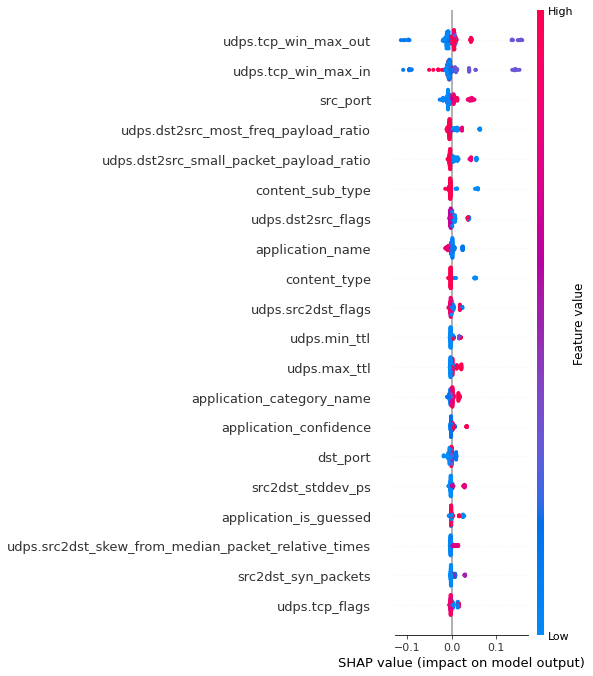

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
import shap

idle, active = (0.5, 2)
out_dir = f'/home/meryem.janati/lustre/nlp_team-um6p-st-sccs-id7fz1zvotk/IDS/janati/IDS/timeouts-IDS/NFStream/extractions/new_idle_{idle}min_active_{active}min/USTC-TF2016'
df = pd.read_csv(out_dir+"/USTC-TF2016.csv")

'''
try:
    df = df.rename(columns={"attack_category": "Attack"})
    df.to_csv(out_dir+"/USTC-TF2016.csv", index=False, header=True)
except:
    pass
'''

df = df[~df.Attack.str.contains('direction_flip')]
df = df.sort_values(by=['bidirectional_last_seen_ms']).reset_index(drop=True)
df_new = df[cols]
df_new['application_name'] = df_new['application_name'].apply(lambda x: x.split(".")[0])
df_new['content_type'] = df_new['content_type'].fillna("unkown/unkown")
df_new['content_sub_type'] = df_new['content_type'].apply(lambda x: x.split("/")[1])
df_new['content_type'] = df_new['content_type'].apply(lambda x: x.split("/")[0])
#df_new['src_port'] = df_new['src_port'].apply(lambda x: port_feature(x))
#df_new['dst_port'] = df_new['dst_port'].apply(lambda x: port_feature(x))
df_new = df_new.fillna(0)
categ_cols = ["application_name", "application_category_name", "content_sub_type", "content_type" ]
df_new, lbl_encoders = encode(df_new,categ_cols)    

# Split df into features and labels
X = df_new.drop(columns=['Attack'])  # Assuming 'label' is the target variable
y = df_new['Attack']
    

# 2. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

# 4. Initialize Extra Trees Classifier and Fit the Model on the subset
clf = ExtraTreesClassifier(n_estimators=100, random_state=42, verbose=1)
clf.fit(X, y)

explainer = shap.TreeExplainer(clf)

sample_indices = np.random.choice(X_test.index, size=200, replace=False)
X_test_sample = X_test.loc[sample_indices]

# Calculate SHAP values for the selected samples
shap_values = explainer.shap_values(X_test_sample)

# Visualize SHAP values
# Let's plot the summary for the first class (adjust the index for your model's output)
shap.summary_plot(shap_values[1], X_test_sample, feature_names=X.columns,show=False)


plt.savefig('../figures/ustc/summary_plot_ustc.pdf', format='pdf', dpi=600, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>